# Lab - Curve fitting in python
## Computational Physics - Phy 325
An introduction to various curve fitting routines useful for physics work.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Lab Instructions:
1. Define an `x` array and generate a mock data set by defining a nonlinear function (using `sin`, `cos`, `exp`, or anything that isn't a polynomial). Your function should take at least two parameters as inputs; three is good, more than four may make the fit quite tricky.
2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data".
3. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.
4. Write a tricky fit and try to break the curve fit routine. A function with several parameters, or multiple features may do it...
5. Extract and fit the exponential section of your plot from the DDP dynamics from last weak.

## Solutions (Dawes)

In [2]:
from scipy.optimize import curve_fit

Then define a function that we expect models our system. In this case, exponential decay with an offset.

In [3]:
x = np.linspace(0,10,100)
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Create a pure (i.e. exact) set of data with some parameters, and then simulate some data of the same system (by adding random noise).

In [4]:
y = func(x, 2.5, 0.6, 0.5)
ydata = y + 0.1*np.random.normal(size=len(x))

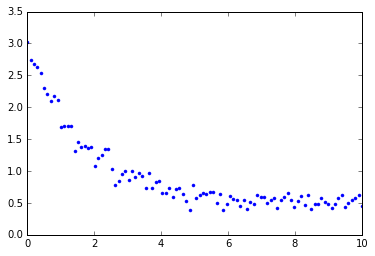

In [5]:
plt.plot(x,ydata,".")

Now carry out the fit. `curve_fit` returns two outputs, the fit parameters, and the covariance matrix. We won't use the covariance matrix yet, but it's good practice to save it into a variable.

In [6]:
parameters, covariance = curve_fit(func, x, ydata)
a = parameters[0]
b = parameters[1]
c = parameters[2]
print("a = {:.3f}   b = {:.3f}   c = {:.3f}".format(a,b,c))

a = 2.475   b = 0.591   c = 0.500


In [7]:
da = np.sqrt(covariance[0,0])
db = np.sqrt(covariance[1,1])
dc = np.sqrt(covariance[2,2])

We can see the parameters are a reasonable match to the pure function we created above. Next, we want to create a "best fit" data set but using the parameters in the model function `func`. The "splat" operator is handy for this, it unpacks the `parameters` array into function arguments `a`, `b`, and `c`.

In [8]:
yfit = func(x, a, b, c) 
# the splat operator unpacks an array into function arguments

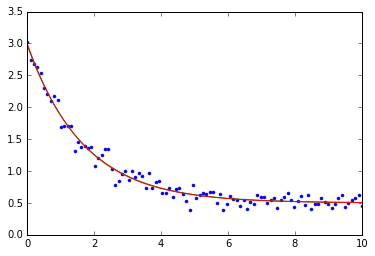

In [9]:
plt.plot(x,ydata,".")
plt.plot(x,yfit)
plt.plot(x,y)

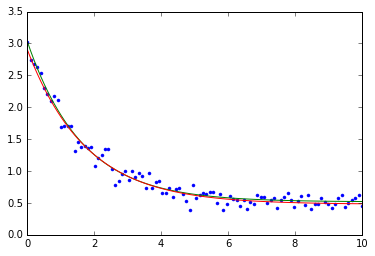

In [10]:
plt.plot(x,ydata,".")
plt.plot(x,func(x, a+da, b+db, c+dc))
plt.plot(x,func(x, a-da, b-db, c-db))


Looks pretty good as far as fits go. Let's check out the error from the underlying function: how close did it get to matching the actual function?

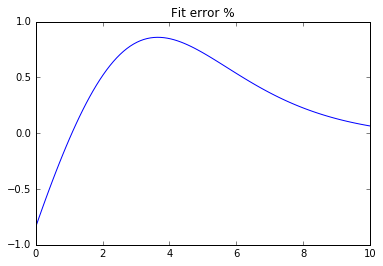

In [11]:
plt.plot(x,((yfit-y)/y)*100)
plt.title("Fit error %")

The error is large in the beginning of the exponential curve. It also turns out that the fit and the original differ by more than one standard deviation in the fit parameter `a`:

In [12]:
print("standard deviations of error in a:",(2.5 - a)/da)
print("standard deviations of error in b:",(0.6 - b)/db)
print("standard deviations of error in c:",(0.5 - c)/dc)

standard deviations of error in a: 0.558057438196
standard deviations of error in b: 0.440893902147
standard deviations of error in c: 0.0134420132454


## Trying to break the fitter:

In [13]:
def fitkiller(x,a,b,c,d):
    return a*np.sin(b*x+c) + d

In [14]:
x = np.linspace(0,2*np.pi,1000)

-0.26
-1.08
1.20
0.11


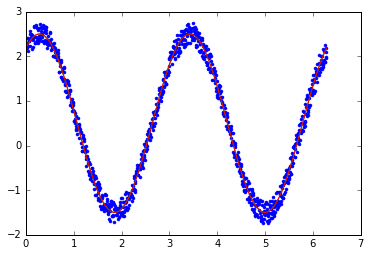

In [27]:
orig_params = np.array([2.0, 2, 1.0, 0.5])

fakedata = fitkiller(x, *orig_params) + 0.5*np.random.random(len(x)) - 0.25

par, cov = curve_fit(fitkiller, x, fakedata, p0=[1,1.5,1,1])

stdevs = np.sqrt(cov.diagonal())

for i in ["{:.2f}".format(f) for f in (par - orig_params)/stdevs]:
    print(i)
    
plt.plot(x,fakedata,'.',label="Fake data")
plt.plot(x,fitkiller(x,*par),label="Fit result")
plt.plot(x,fitkiller(x,*orig_params),label="Original model")

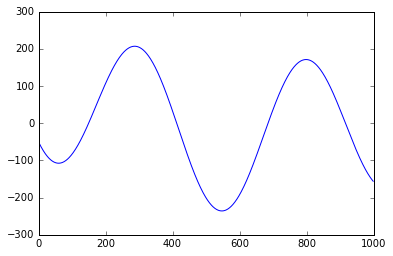

In [18]:
plt.plot((fitkiller(x, *par) - fitkiller(x, *orig_params))*100)

In [ ]:
plt.